### Importing Libraries

In [1]:
import pandas as pd                  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.model_selection import train_test_split

### Storing the dataset into dataframe

In [2]:
df= pd.read_csv("electric_consumption.csv")
df.head(5)

,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


### Displaying the columns of dataset

In [3]:
df.columns

Index(['dt', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

### Checking the shape of dataset

In [4]:
df.shape

(2075259, 8)

### Describing the dataset

In [5]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


### Checking the information of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   dt                     object 
 1   Global_active_power    float64
 2   Global_reactive_power  float64
 3   Voltage                float64
 4   Global_intensity       float64
 5   Sub_metering_1         float64
 6   Sub_metering_2         float64
 7   Sub_metering_3         float64
dtypes: float64(7), object(1)
memory usage: 126.7+ MB


### Displaying the null percentage against every column

In [7]:
m=df.isnull().sum()*100 / len(df)
pd.DataFrame({'column_name': df.columns,'percent_missing': m})

,column_name,percent_missing
dt,dt,0.000000
Global_active_power,Global_active_power,1.251844
Global_reactive_power,Global_reactive_power,1.251844
Voltage,Voltage,1.251844
Global_intensity,Global_intensity,1.251844
Sub_metering_1,Sub_metering_1,1.251844
Sub_metering_2,Sub_metering_2,1.251844
Sub_metering_3,Sub_metering_3,1.251844


In [8]:
df.isnull().sum()

dt                           0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

### Dealing with the NULL values of the columns 

In [9]:
df.ffill(axis=0,inplace=True)

In [10]:
df.isnull().sum()

dt                       0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Changing the datatype if needed any

In [11]:
df.dtypes

dt                        object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [12]:
df[["dt"]].dtypes

dt    object
dtype: object

In [13]:
df["dt"] = pd.to_datetime(df["dt"])

In [14]:
df[["dt"]].dtypes

dt    datetime64[ns]
dtype: object

### Creating new column "power consumption" from the existing columns

In [15]:
eq1 = (df['Global_active_power']*1000/60) 
eq2 = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['power_consumption'] = eq1 - eq2
df.head()

,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


### Checking the number of columns in dataframe

In [16]:
col=len(df.axes[1])
col

9

In [17]:
df.columns

Index(['dt', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'power_consumption'],
      dtype='object')

### Checking for the duplicates in the dataset

In [18]:
df.duplicated().sum()

0

### Extracting day,month and year from dt column

In [19]:
df["dt_day"]=df["dt"].dt.day
df["dt_month"]=df["dt"].dt.month
df["dt_year"]=df["dt"].dt.year
df['dt_quarter']=df['dt'].dt.quarter
df['dt_hour']=df['dt'].dt.hour
df['dt_minute']=df['dt'].dt.minute

In [20]:
df.columns

Index(['dt', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'power_consumption', 'dt_day', 'dt_month', 'dt_year',
       'dt_quarter', 'dt_hour', 'dt_minute'],
      dtype='object')

In [21]:
df.shape

(2075259, 15)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   dt                     datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
 8   power_consumption      float64       
 9   dt_day                 int64         
 10  dt_month               int64         
 11  dt_year                int64         
 12  dt_quarter             int64         
 13  dt_hour                int64         
 14  dt_minute              int64         
dtypes: datetime64[ns](1), float64(8), int64(6)
memory usage: 237.5 MB


### Creating a new column as sub metering sum

In [23]:
df["sub_metering_sum"]=df["Sub_metering_1"]+df["Sub_metering_2"]+df["Sub_metering_3"]

In [24]:
df.head(5)

,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,dt_day,dt_month,dt_year,dt_quarter,dt_hour,dt_minute,sub_metering_sum
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667,16,12,2006,4,17,24,18.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333,16,12,2006,4,17,25,17.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667,16,12,2006,4,17,26,19.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000,16,12,2006,4,17,27,18.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000,16,12,2006,4,17,28,18.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   dt                     datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
 8   power_consumption      float64       
 9   dt_day                 int64         
 10  dt_month               int64         
 11  dt_year                int64         
 12  dt_quarter             int64         
 13  dt_hour                int64         
 14  dt_minute              int64         
 15  sub_metering_sum       float64       
dtypes: datetime64[ns](1), float64(9), int64(6)
memory usage: 253.3 MB


### Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Histplot for Global active power')

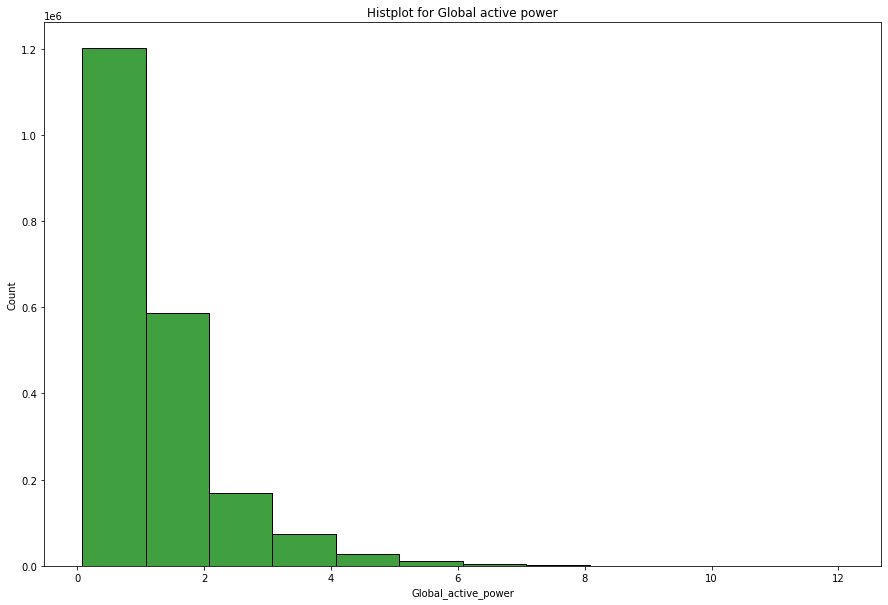

In [26]:
plt.subplots(figsize=(15,10))
sns.histplot(df["Global_active_power"],binwidth=1,color="green")
plt.title("Histplot for Global active power")

Text(0.5, 1.0, 'Scatterplot of global active power with respect to Voltage')

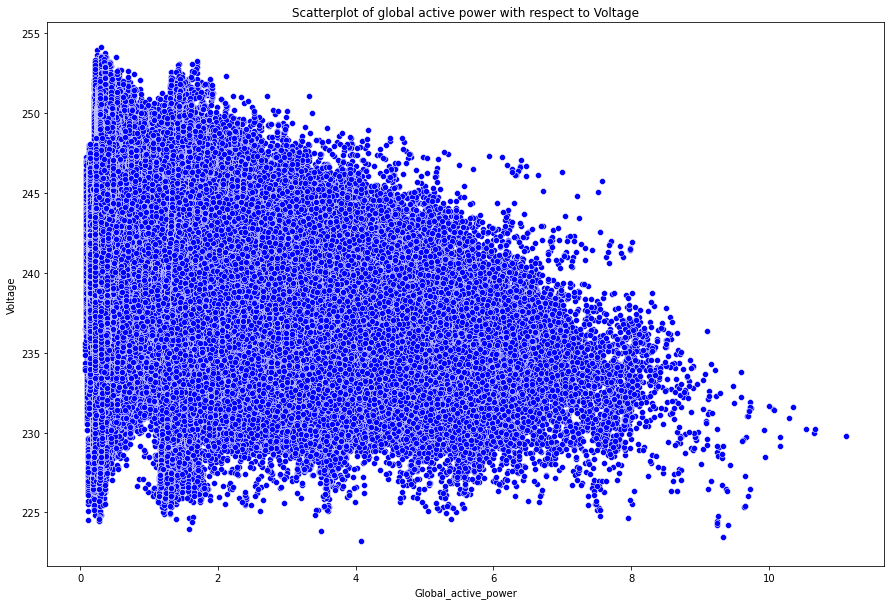

In [27]:
plt.subplots(figsize=(15,10))
x=df["Global_active_power"]
y=df["Voltage"]

sns.scatterplot(x,y,color="blue",vmin=0,vmax=50)
plt.title("Scatterplot of global active power with respect to Voltage")

Text(0.5, 1.0, 'Histplot for Voltage')

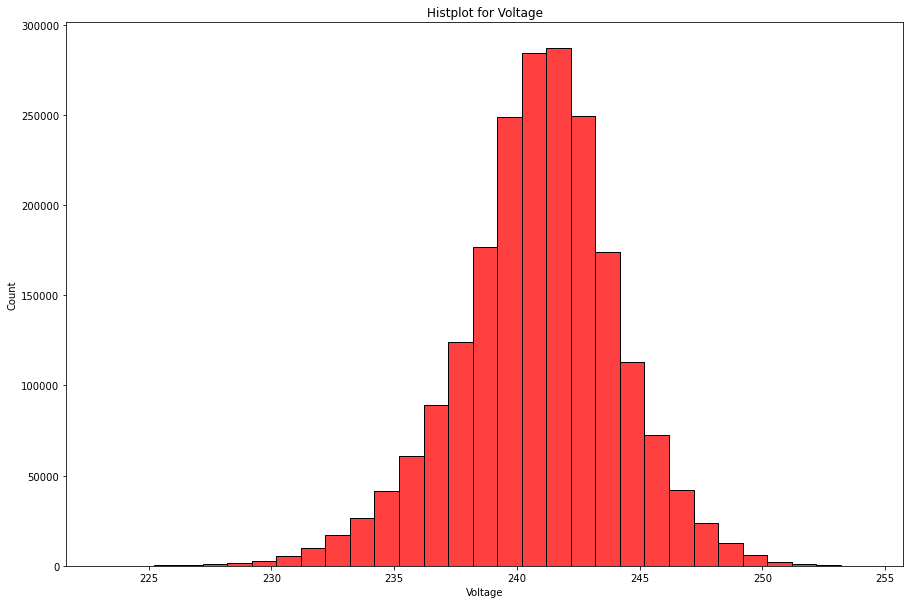

In [28]:
plt.subplots(figsize=(15,10))
sns.histplot(df["Voltage"],binwidth=1,color="red")
plt.title("Histplot for Voltage")

Text(0.5, 1.0, 'Histplot for Power Consumption')

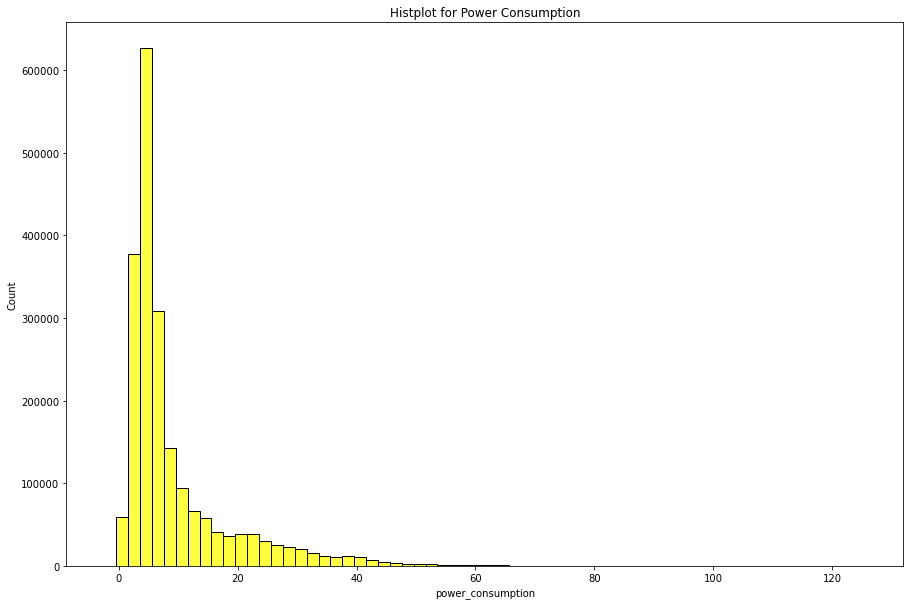

In [29]:
plt.subplots(figsize=(15,10))
sns.histplot(df["power_consumption"],binwidth=2,color="yellow")
plt.title("Histplot for Power Consumption")

<AxesSubplot:xlabel='Global_intensity', ylabel='Count'>

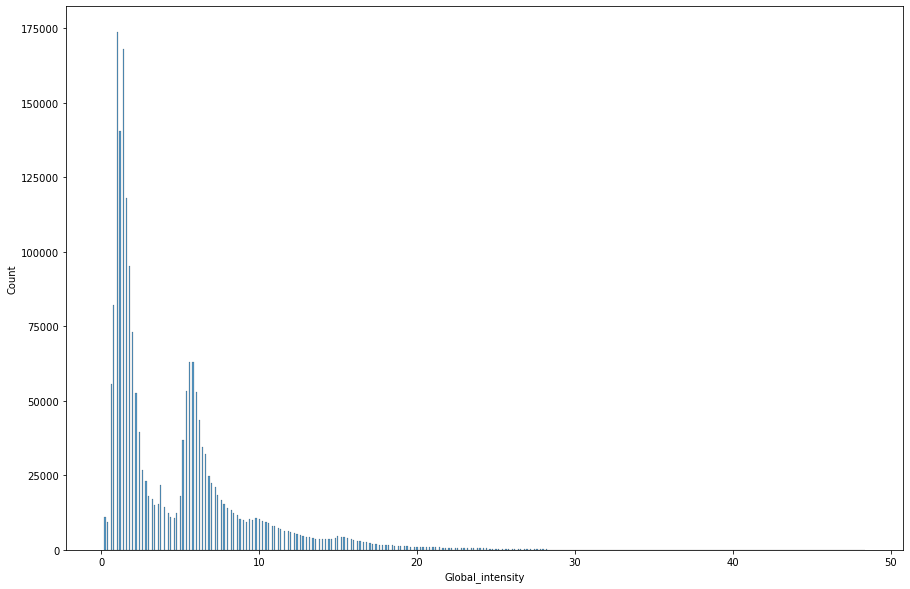

In [30]:
plt.subplots(figsize=(15,10))
sns.histplot(df["Global_intensity"])

Text(0.5, 1.0, 'Histplot for Global intensity')

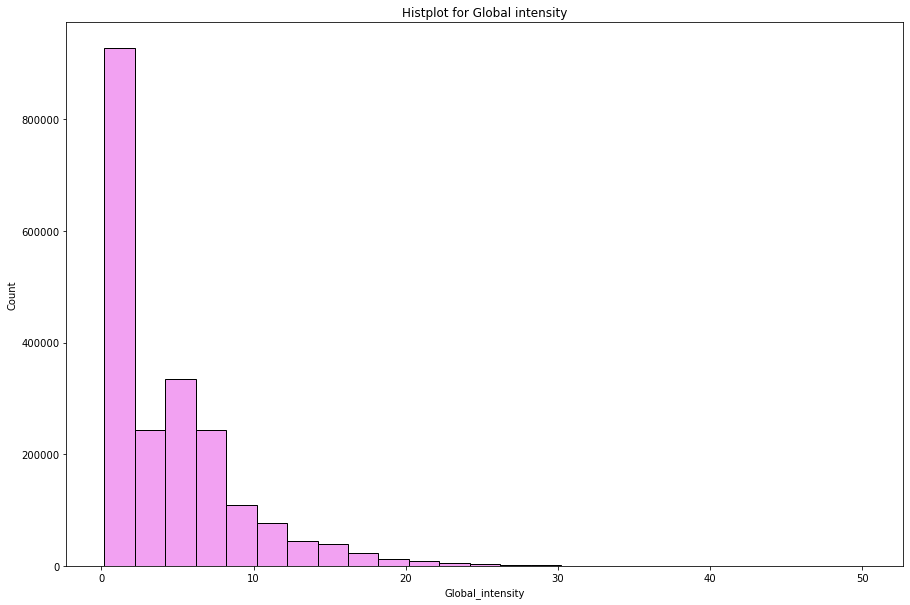

In [31]:
plt.subplots(figsize=(15,10))
sns.histplot(df["Global_intensity"],binwidth=2,color="violet")
plt.title("Histplot for Global intensity")

Text(0.5, 1.0, 'Histplot for Voltage')

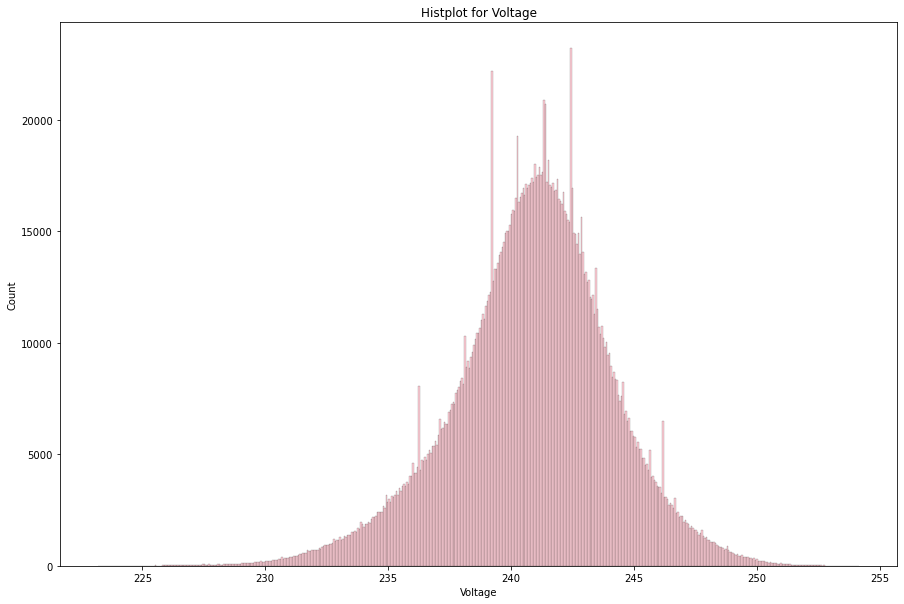

In [32]:
plt.subplots(figsize=(15,10))
sns.histplot(df["Voltage"],color="pink")
plt.title("Histplot for Voltage")

Text(0.5, 1.0, 'Correlation heatmap')

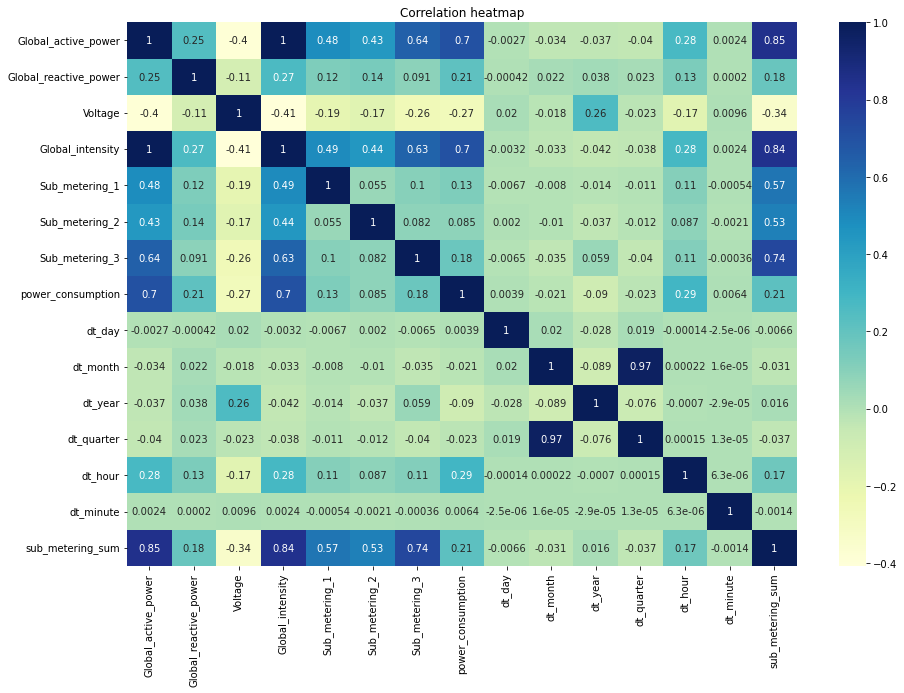

In [33]:
corr=df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.title("Correlation heatmap")

In [34]:
print(corr)

                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.246362 -0.395647   
Global_reactive_power             0.246362               1.000000 -0.111775   
Voltage                          -0.395647              -0.111775  1.000000   
Global_intensity                  0.998884               0.265558 -0.407454   
Sub_metering_1                    0.484388               0.123135 -0.194261   
Sub_metering_2                    0.434581               0.139438 -0.165659   
Sub_metering_3                    0.639681               0.090631 -0.260498   
power_consumption                 0.700835               0.209660 -0.272879   
dt_day                           -0.002688              -0.000417  0.019580   
dt_month                         -0.034294               0.022269 -0.017633   
dt_year                          -0.037072               0.037803  0.257956   
dt_quarter                       -0.039556          

### Dropping dt column 

In [35]:
df.drop(['dt'], axis=1, inplace = True)

In [36]:
df.shape

(2075259, 15)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   power_consumption      float64
 8   dt_day                 int64  
 9   dt_month               int64  
 10  dt_year                int64  
 11  dt_quarter             int64  
 12  dt_hour                int64  
 13  dt_minute              int64  
 14  sub_metering_sum       float64
dtypes: float64(9), int64(6)
memory usage: 237.5 MB


### Splitting of Train and the Test Data

In [38]:
x=df.drop(columns=['Global_active_power','Sub_metering_1','Sub_metering_2','Sub_metering_3','sub_metering_sum','power_consumption'])
y=df["power_consumption"]

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3)


### Checking the size after splitting of data

In [40]:
x_train.shape

(1452681, 9)

In [41]:
x_test.shape

(622578, 9)

In [42]:
y_train.shape

(1452681,)

In [43]:
y_test.shape

(622578,)

### EDA after splitting of data

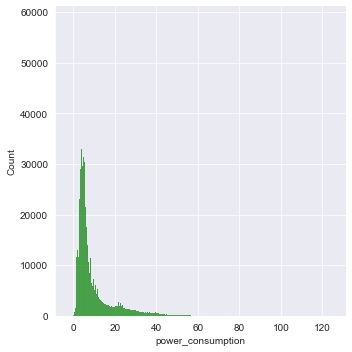

In [44]:
sns.set_style("darkgrid")
sns.displot(y,kde=False,color="green")

### Displaying data after splitting

In [45]:
x_train.head(5)

,Global_reactive_power,Voltage,Global_intensity,dt_day,dt_month,dt_year,dt_quarter,dt_hour,dt_minute
1802068,0.160,242.00,3.8,21,5,2010,2,3,52
2068344,0.088,243.57,1.4,22,11,2010,4,1,48
310176,0.160,235.36,1.4,20,7,2007,3,3,0
589721,0.090,243.48,2.4,30,1,2008,1,6,5
794056,0.078,239.94,3.4,20,6,2008,2,3,40


In [46]:
x_train.describe()

,Global_reactive_power,Voltage,Global_intensity,dt_day,dt_month,dt_year,dt_quarter,dt_hour,dt_minute
count,1.452681e+06,1.452681e+06,1.452681e+06,1.452681e+06,1.452681e+06,1.452681e+06,1.452681e+06,1.452681e+06,1.452681e+06
mean,1.234021e-01,2.408406e+02,4.607404e+00,1.577683e+01,6.448871e+00,2.008437e+03,2.487525e+00,1.150456e+01,2.950482e+01
std,1.126337e-01,3.235601e+00,4.430299e+00,8.784881e+00,3.416103e+00,1.128823e+00,1.110869e+00,6.923681e+00,1.732104e+01
min,0.000000e+00,2.232000e+02,2.000000e-01,1.000000e+00,1.000000e+00,2.006000e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.800000e-02,2.390000e+02,1.400000e+00,8.000000e+00,3.000000e+00,2.007000e+03,1.000000e+00,6.000000e+00,1.400000e+01
50%,1.000000e-01,2.410200e+02,2.600000e+00,1.600000e+01,6.000000e+00,2.008000e+03,2.000000e+00,1.200000e+01,3.000000e+01
75%,1.940000e-01,2.428700e+02,6.400000e+00,2.300000e+01,9.000000e+00,2.009000e+03,3.000000e+00,1.800000e+01,4.500000e+01
max,1.390000e+00,2.541500e+02,4.840000e+01,3.100000e+01,1.200000e+01,2.010000e+03,4.000000e+00,2.300000e+01,5.900000e+01


In [47]:
y_train.head(5)

1802068    4.533333
2068344    5.433333
310176     4.400000
589721     8.666667
794056     2.566667
Name: power_consumption, dtype: float64

In [48]:
y_train.describe()

count    1.452681e+06
mean     9.293401e+00
std      9.551944e+00
min     -2.400000e+00
25%      3.800000e+00
50%      5.500000e+00
75%      1.040000e+01
max      1.221667e+02
Name: power_consumption, dtype: float64

### Modelling

The various types of regression are :

i)Linear Regression

ii)Decision Tree Regression

iii)Random Forest Regression

iv)Support Vector Regression

v)Extreme Gradient Boost Regression


### Linear Regression 

In [49]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [50]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

In [51]:
print("MSE Score : "+str(mean_squared_error(y_test,pred_lr)))
print("R2 Score : "+str(r2_score(y_test,pred_lr)))

MSE Score : 44.72784167202161
R2 Score : 0.5075229738265784


### Decision Tree Regression

In [52]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)

In [53]:
print("MSE Score : "+str(mean_squared_error(y_test,pred_dt)))
print("R2 Score : "+str(r2_score(y_test,pred_dt)))

MSE Score : 12.465707734613172
R2 Score : 0.8627460113254367


### Random Forest Regression

In [54]:
#from sklearn.ensemble import RandomForestRegressor
#rf=RandomForestRegressor()
#rf.fit(x_train,y_train)
#pred_rf=rf.predict(x_test)

In [55]:
#print("MSE Score : "+str(mean_squared_error(y_test,pred_rf)))
#print("R2 Score : "+str(r2_score(y_test,pred_rf)))

### Support Vector Regression

In [ ]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(x_train, y_train)
pred_svm= svm.predict(X_test)

In [ ]:
print("MSE Score : "+str(mean_squared_error(y_test,pred_svm)))
print("R2 Score : "+str(r2_score(y_test,svm_rf)))

### XG Boost Regression

In [58]:
import xgboost as xgb
xg=xgb.XGBRegressor()
xg.fit(x_train,y_train)
pred_xg=xg.predict(x_test)

In [59]:
print("MSE Score : "+str(mean_squared_error(y_test,pred_xg)))
print("R2 Score : "+str(r2_score(y_test,pred_xg)))

MSE Score : 17.39773673639251
R2 Score : 0.8084417819014468
